# Task4 Results: Multi-Tasking TSP (MFEA) Experiments

In this notebook, we will investigate the **multi-tasking TSP** problem solved by a Multifactorial Evolutionary Algorithm (MFEA). The goals are:

1. Observe how the algorithm performs on the **original TSP** (Task 0) and the **new TSP** with random offsets (Task 1).
2. Conduct a sensitivity experiment on the **random mating probability (RMP)** parameter to see how knowledge transfer affects solution quality.

## 1. Environment Setup

Let's import the necessary libraries and ensure our project paths are set.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## 2. Import the Multi-Tasking TSP Solver

We'll use the `run_multitasking_tsp` function from `task4_multitask.py`. This function:
- Loads the original TSP data (100 customers)
- Creates a new TSP by adding random offsets ([0,50]) to each customer's coordinates
- Runs MFEA with a specified RMP

We'll define the TSP file path (`data/TSP.csv`) below:

In [2]:
from src.tasks.task4_multitask import run_multitasking_tsp

tsp_file = os.path.abspath(os.path.join(module_path, "data", "TSP.csv"))
print("TSP file path:", tsp_file)

TSP file path: C:\Robbie\1 Program\1-2 COMP6707 ADVANCED COMPUTATIONAL INTELLIGENCE\COMP6707-Project\COMP6707_Project_24037513R\data\TSP.csv


### 2.1 Single Experiment with Default Parameters

Let's do a quick run using default or nominal parameters:
- RMP=0.3
- pop_size=100
- max_gen=500


In [4]:
res_default = run_multitasking_tsp(tsp_file, RMP=0.3, pop_size=100, max_gen=500)
best_task0_def, best_task1_def, new_coords_def = res_default

print("Single Experiment (RMP=0.3) Results:")
if best_task0_def is not None:
    print(f"Task0 Best Distance: {best_task0_def['obj']:.4f}")
    print("Route (first 10):", best_task0_def['gene'][:10], "...")
if best_task1_def is not None:
    print(f"Task1 Best Distance: {best_task1_def['obj']:.4f}")
    print("Route (first 10):", best_task1_def['gene'][:10], "...")

Single Experiment (RMP=0.3) Results:
Task0 Best Distance: 879.1500
Route (first 10): [23 47 49 78 94 73 37 82 68 40] ...
Task1 Best Distance: 1331.1426
Route (first 10): [37 46 39 53 77 21 29 40 57 98] ...


## 3. Sensitivity Experiment: RMP (Random Mating Probability)

We want to see how different RMP values affect:
1. The final best distance for Task0
2. The final best distance for Task1

We'll iterate over a list of RMP values, e.g. [0.0, 0.1, 0.3, 0.5, 0.8, 1.0], and record the best distances found for each task.

In [5]:
rmp_values = [0.0, 0.1, 0.3, 0.5, 0.8, 1.0]
pop_size = 100
max_gen = 300  # reduce for demonstration

experiment_records = []
for rmp in rmp_values:
    print(f"\nRunning MFEA with RMP={rmp}")
    best_t0, best_t1, new_coords = run_multitasking_tsp(tsp_file, 
                                                        RMP=rmp, 
                                                        pop_size=pop_size, 
                                                        max_gen=max_gen)
    dist_t0 = best_t0['obj'] if best_t0 else None
    dist_t1 = best_t1['obj'] if best_t1 else None
    experiment_records.append({
        "RMP": rmp,
        "best_dist_task0": dist_t0,
        "best_dist_task1": dist_t1
    })


Running MFEA with RMP=0.0

Running MFEA with RMP=0.1

Running MFEA with RMP=0.3

Running MFEA with RMP=0.5

Running MFEA with RMP=0.8

Running MFEA with RMP=1.0


### 3.1 Summarize Results

Then put the results into a Pandas DataFrame for clarity.

In [6]:
import pandas as pd

df_rmp = pd.DataFrame(experiment_records)
df_rmp

,RMP,best_dist_task0,best_dist_task1
0,0.0,963.588820,1437.927403
1,0.1,979.897317,1648.691916
2,0.3,1058.177958,1382.142548
3,0.5,966.469141,1507.147494
4,0.8,1064.081072,1468.868613
5,1.0,962.327637,1423.931875


We should see, for each RMP, the best distance found for Task0 and Task1. 


## 4. Visualizing the Effect of RMP

We can make a simple line plot for each task's best distance vs RMP.

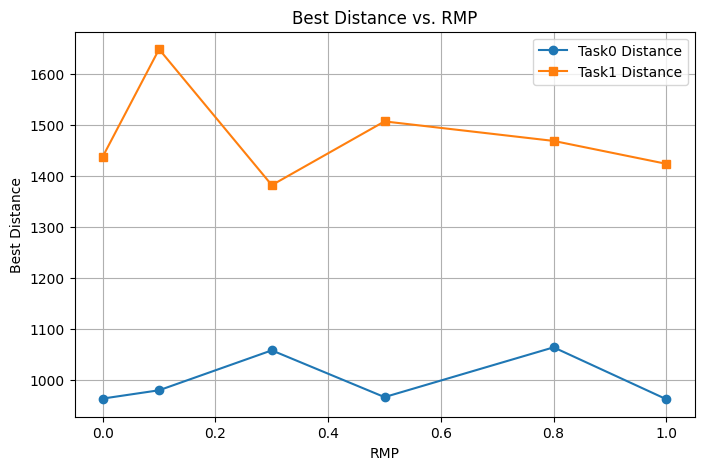

In [7]:
plt.figure(figsize=(8,5))
plt.plot(df_rmp["RMP"], df_rmp["best_dist_task0"], marker='o', label="Task0 Distance")
plt.plot(df_rmp["RMP"], df_rmp["best_dist_task1"], marker='s', label="Task1 Distance")
plt.title("Best Distance vs. RMP")
plt.xlabel("RMP")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.show()

### 4.1 Observations

- Impact on Task 0 (Original TSP):

The best performance (lowest distance ≈ 950) is observed at RMP = 0.0, 0.5, and 1.0.

The worst performance occurs around RMP = 0.3 and 0.8, with a noticeable peak around RMP = 0.8 (distance ≈ 1075).

This suggests that excessive or suboptimally tuned cross-task mating might inject noise into the Task0 search space.

- Impact on Task 1 (Perturbed TSP):

Task1 shows more dramatic fluctuations across RMP values.

The worst performance occurs at RMP = 0.1 (distance > 1650), suggesting harmful knowledge transfer at this setting.

The best performance appears around RMP = 0.3, with steadily decreasing distance as RMP increases, indicating that Task1 benefits from more inter-task information sharing.

Task1 performance improves again toward RMP = 1.0, suggesting that Task1 can exploit knowledge from Task0 when RMP is high.

- Task Similarity & Knowledge Transfer:

Since Task1 is generated by applying perturbations on Task0, the two tasks share structural similarity, making moderate-to-high RMP (> 0.3) potentially beneficial.

However, overly frequent cross-task mating may still disrupt elite structures in Task0 (as seen at RMP=0.8).

- Optimal RMP Range:

While there's no single RMP that is optimal for both tasks simultaneously, RMP ≈ 1.0 appears to offer a good trade-off, yielding near-best performance on both Task0 and Task1.


## 5. Checking Final Routes for a Specific RMP

If we want to visualize the final routes for a given RMP, we can re-run the solver and then call the plotting function. For instance, let's pick `RMP=1` and see the routes.


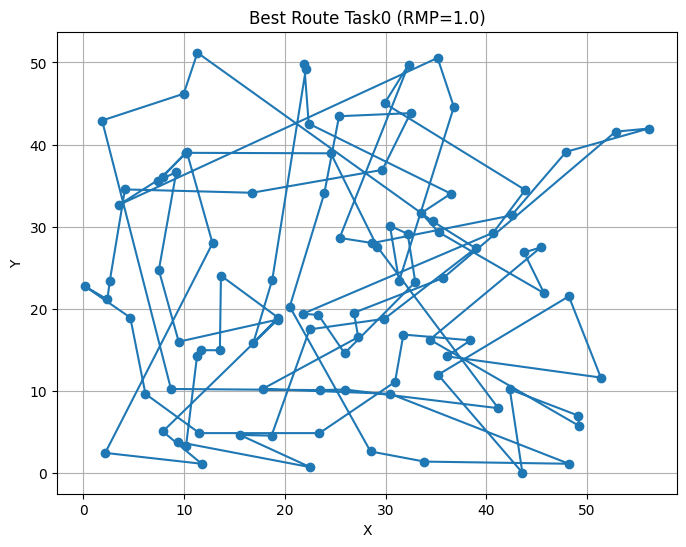

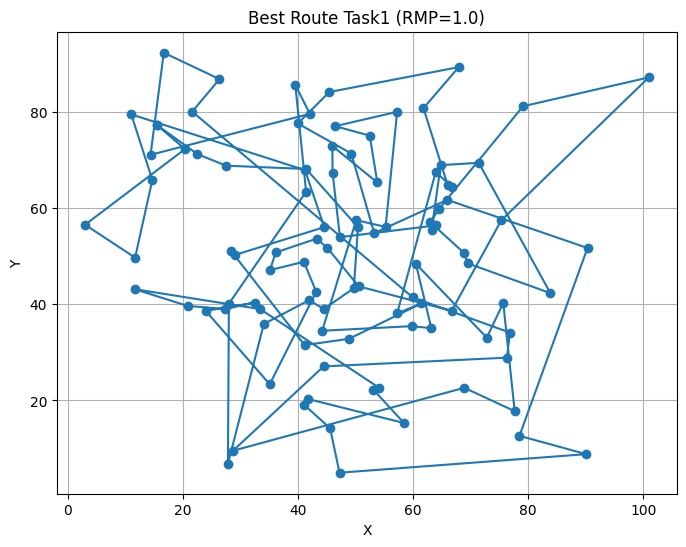

In [11]:
res_rmp1 = run_multitasking_tsp(tsp_file, RMP=1.0, pop_size=100, max_gen=300)
best_t0_1, best_t1_1, new_coords_1 = res_rmp1

if best_t0_1 is not None:
    from src.utils.visualization import plot_tsp_route
    from src.utils.data_loader import load_tsp_data
    coords_original = load_tsp_data(tsp_file)["coords"]
    plot_tsp_route(coords_original, best_t0_1["gene"], title="Best Route Task0 (RMP=1.0)", show=True)

if best_t1_1 is not None:
    plot_tsp_route(new_coords_1, best_t1_1["gene"], title="Best Route Task1 (RMP=1.0)", show=True)